# Assignment 7: Mathematical modelling - model estimation
This assignment introduces you to the estimation of parameters through the minimization of a loss function. We are doing this in the context of linear regression. You will learn to plot the relationship between 2 variables, write a function that makes the model prediction, write a function that calculates the loss function, and how to estimate the parameters of the model. While there are many libraries that implement simple regression, you are learning here a universal way that is applicable to ANY mathematical model. 

The data set possum.csv is a sample of 46 possums that were caught in Victoria (NZ) in a field study. 
- age:  Age (years).
- headL:  Head length, in mm.
- skullW:  Skull width, in mm.
- totalL:  Total length, in cm.
- tailL:  Tail length, in cm.


## Preliminaries

In [2]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as so
import pandas as pd 
import numpy as np
import seaborn as sns

df = pd.read_csv('possum.csv')

## Task 1: Scatterplots
### Question 1
Make a scatter plot between age and head size. Make sure to label your x-axis and y-axis. Written answer: is there a relationship between the two variables? How would you describe it qualitatively (is the relationship positive or negative, is it linear, etc)? 

Text(0, 0.5, 'Head Size')

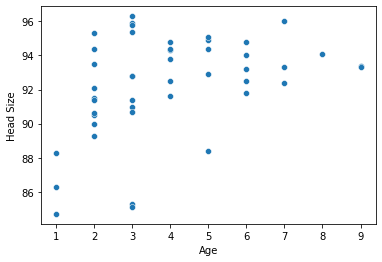

In [8]:
sns.scatterplot(x="age",y="headL",data=df)
plt.xlabel("Age")
plt.ylabel("Head Size")

>It seems as if there is a positive, logistic (it flattents after year 3 relationship, but, there is a lot of variance, which may cancel out the seeming pattern altogether.

### Question 2. 
Make a scatter plot between head size and skull width. Written answer: is there a relationship between the two variables? How would you describe it qualitatively? Are there unusual data points (i.e. outliers) in the data set? What may be a possible explanation?    

Text(0, 0.5, 'Skull Width')

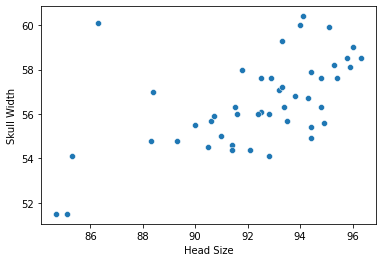

In [9]:
sns.scatterplot(x="headL",y="skullW",data=df)
plt.xlabel("Head Size")
plt.ylabel("Skull Width")

>It seems there is a positive linear relationship, but there is a very abnormal outlier at about 87~ head size with 60~ skull width. A possible explanation could be a birth defect or something of the sort.

## Task 2 Fit a linear regression line "by hand"
### Question 1
Write a function simpleRegPredict(b,x) that takes as an input b a list of two parameter [intercept,slope] and as x values of an x-variable. The function should then return the predicted values for y following the linear model (see lecture). Call the function using b=[83,2] as parameters and to predict the value for x=2. 


In [10]:
def simpleRegPredict(b,x):
    return b[0] + b[1]*x

simpleRegPredict([83,2],2)

87

### Question 2
Write a function plotPrediction(b,x,y,fcn=simpleRegPredict) that makes a scatter plot of the x vs. the y-variable and then plots a regression line into the plot (see lecture / lab for hints). Call the function for x being the age, y=headL, and b=[83,2].

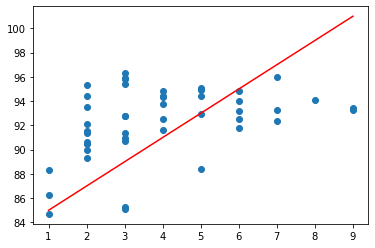

In [12]:
def plotPrediction(b,x,y,predictFcn=simpleRegPredict):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y)
    xp = np.linspace(min(x),max(x),num=50)
    yp = predictFcn(b,xp)
    ax.plot(xp,yp,'r')

plotPrediction([83,2],df.age,df.headL)

### Question 3
Write a loss function simpleRegLossRSS(b,x,y) that takes as the inputs the parameters (b), the explanatory (x) and the response variable (y) and then calculates and returns the residual sum-of-squares of the linear fit. It also should return the derivate of the Loss function in respect to the two parameters (see lecture / lab). The function should use your function simpleRegPred. Call the function with b=[83,2] as parameters, x=age and y= headL. What is the residual sum of squares? What is the derivative? In order to minimize the Loss, would you need to increase or decrease the slope/intercept? 

In [27]:
def simpleRegLossRSS(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    deriv = np.zeros(2)
    deriv[0]=-2*sum(res)
    deriv[1]=-2*sum(res*x)
    return (rss,deriv)

simpleRegLossRSS([83,2],df.age,df.headL)

(818.3900000000001, array([-128.6,   54.2]))

>The residual sum of squares is 818.39 and the derivates are -128.6 and 54.2. Based on this, I would increase the intercept and decrease the slope

### Question 4
First try to reduce the slope value and try parameter values b=[83,0.6]. Then increase the intercept and try b=[89,0.6]. For each value make the prediction plot and report the residual-sum-of squares using your functions from question 2 and 3. Which fit provides the lowest loss (rss)? How do the derivatives change for each value? And according to the derivative, which direction should you change the parameters? Play around with other parameter settings. Can you find one that gives you a loss below rss=350? 

(2537.8700000000003, array([ -638.2, -2510.6]))
(364.66999999999985, array([ -86.2, -326.6]))


Text(0.5, 1.0, '[89,0.6]')

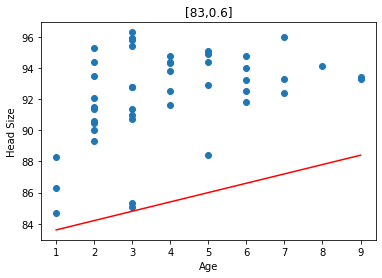

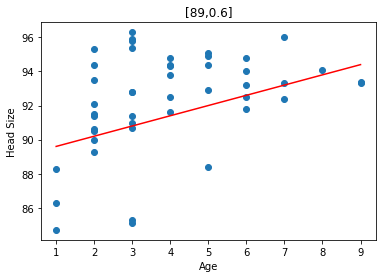

In [30]:
print(simpleRegLossRSS([83,0.6],df.age,df.headL))
plotPrediction([83,0.6],df.age,df.headL)
plt.xlabel("Age")
plt.ylabel("Head Size")
plt.title("[83,0.6]")
print(simpleRegLossRSS([89,0.6],df.age,df.headL))
plotPrediction([89,0.6],df.age,df.headL)
plt.xlabel("Age")
plt.ylabel("Head Size")
plt.title("[89,0.6]")

> The b=[89,0.6] provides the lowest RSS, and compared to the b=[89,0.6] one, the derivatives get much closer to 0. As per my derivatives, both intercept and slope should be increased.<br />The following shows b=[90.03,0.574] gives an RSS of 324.048<350

(324.04829600000005, array([-0.904,  0.688]))


Text(0.5, 1.0, '[90.03,0.574]')

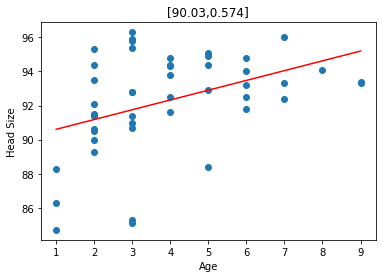

In [56]:
print(simpleRegLossRSS([90.03,0.574],df.age,df.headL))
plotPrediction([90.03,0.574],df.age,df.headL)
plt.xlabel("Age")
plt.ylabel("Head Size")
plt.title("[90.03,0.574]")

## Task 3: Fit the linear model using scipy.optimize.minimize
### Question 1
Use scipy.optimize.minimize to minimize the function value of simpleRegLossRSS(b,x,y) from task 2, question 2. As starting values simply give b0=[0,0]
Show the result structure. Written answer: What is the estimated parameter value for intercept and slope and what is the best achieved rss? 

In [57]:
RESULT = so.minimize(simpleRegLossRSS, [0, 0], args = (df.age,df.headL), jac = True)
print(RESULT)

      fun: 324.0206458055927
 hess_inv: array([[ 0.05082114, -0.01009765],
       [-0.01009765,  0.00255215]])
      jac: array([-4.51905180e-12, -3.36228823e-11])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([90.08288948,  0.56311585])


>The estimated paramaters for intercept and slope are 90.08288948 and 0.56311585 respectfully for an RSS of 324.0206458055927.

### Question 2
Use your function plotPrediction (from above) to plot this best linear fit between age and head length. 

Text(0.5, 1.0, '[90.08288948, 0.56311585]')

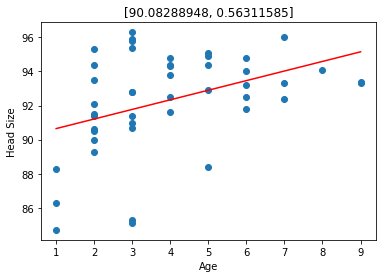

In [58]:
plotPrediction([90.08288948, 0.56311585],df.age,df.headL)
plt.xlabel("Age")
plt.ylabel("Head Size")
plt.title("[90.08288948, 0.56311585]")

### Question 3
Calculate the total sum-of-squares by subtracting the mean from all the y-values, squaring the result and finally summing them up. What is the total sum of squares for headL? 

In [59]:
print(sum((df.headL - np.mean(df.headL))**2))

386.1445652173914


### Question 4
Write a function simpleRegFit(x,y) that (a) estimates the parameters as done in Question 3.1, (b) plots the predictions as done in 3.2 and (c) calculates (and returns) R2 of the fit.  Call the function with x=age and y=headL.  Written answer: What is the R2 of the fit? How can you interpret it? 

R2 is 0.16088254246650913


Text(0, 0.5, 'Head Size')

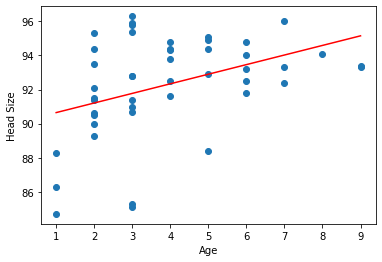

In [70]:
def simpleRegFit(x,y):
    RESULT = so.minimize(simpleRegLossRSS, [0, 0], args = (x,y), jac = True)
    plotPrediction(RESULT.x,x,y)
    TSS = sum((y - np.mean(y))**2)
    R2 = 1-(RESULT.fun/TSS)
    print('R2 is',R2)
simpleRegFit(df.age,df.headL)
plt.xlabel("Age")
plt.ylabel("Head Size")

>R2 is R2 is 0.16088254246650913. We can interpret this to mean that only 16% of the data fits the regression model, so it is not a great fit at all.

### Question 5
Fit a linear model between age (x) and tail length (y). How good is the fit? Are there outliers? How much would the slope of the line change if you excluded the outlier?  

R2 is 0.22286587947604142


Text(0, 0.5, 'Tail Length')

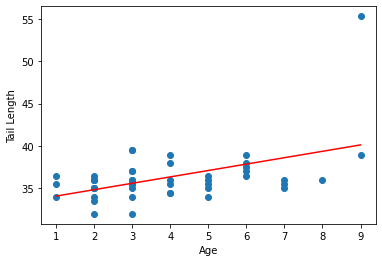

In [71]:
simpleRegFit(df.age,df.tailL)
plt.xlabel("Age")
plt.ylabel("Tail Length")

>The fit as per R2 isn't great (0.22) but this is probably because of the very large outlier at age 9. Removing it would drastically decrease the slope and better the fit.